# Cancer Prediction Lab for Supervised Machine Learning: Classification

Author: Tan Song Xin Alastair

Source: Kaggle

Source URL: https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset

Accessed Date: 02 February 2025

In [78]:
import pandas as pd
import numpy as np
import sklearn, statistics
from scipy.stats import kstest
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read dataset
pd_dataset = pd.read_csv("cancer_pred_dataset.csv")

# Check if file is read properly.
print(pd_dataset.head())

# Check if there are null/na values to deal with
print(pd_dataset.isna().sum())

   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


Age Statistics=0.07162216580865866, p-value=3.891956357447314e-07
Log Age Statistics=0.09156205580510224, p-value=2.1516391261112486e-11
Boxcox Age Statistics=0.07219479869679402, p-value=3.0371878232906383e-07
Sqrt Age Statistics=0.07501624938587448, p-value=8.695030230524278e-08


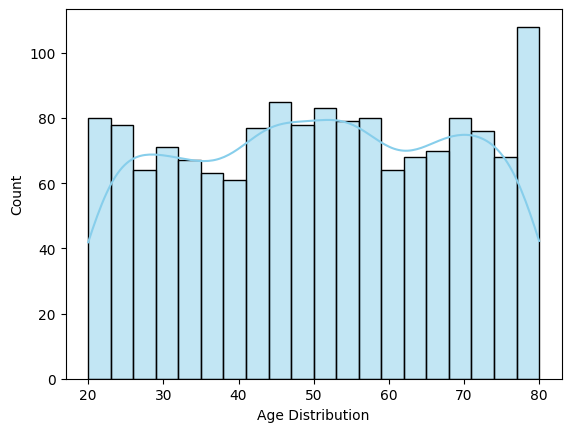

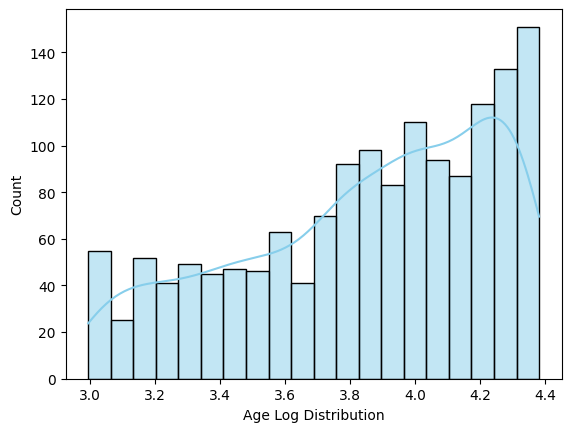

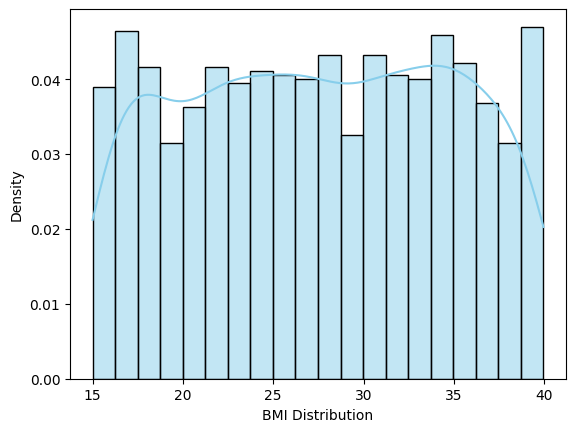

In [77]:
#Basic Age Two-Sided Kolmogorov-Smirnov Test. p > 0.05 means p is likely normal

stat, p = kstest(pd_dataset["Age"], 'norm', args=(pd_dataset["Age"].mean(), pd_dataset["Age"].std()))
print(f"Age Statistics={stat}, p-value={p}")

stat, p = kstest(np.log(pd_dataset["Age"]), 'norm', args=(np.log(pd_dataset["Age"]).mean(), np.log(pd_dataset["Age"]).std()))
print(f"Log Age Statistics={stat}, p-value={p}")

boxcox_result, _ = scipy.stats.boxcox(pd_dataset["Age"])

stat, p = kstest(boxcox_result, 'norm', args=(boxcox_result.mean(), boxcox_result.std()))
print(f"Boxcox Age Statistics={stat}, p-value={p}")

stat, p = kstest(np.sqrt(pd_dataset["Age"]), 'norm', args=(np.sqrt(pd_dataset["Age"]).mean(), np.sqrt(pd_dataset["Age"]).std()))
print(f"Sqrt Age Statistics={stat}, p-value={p}")

age_plot = sns.histplot(pd_dataset['Age'], bins=20, kde=True, stat='count', color='skyblue')
plt.xlabel("Age Distribution")
plt.show(age_plot)

age_log_plot = sns.histplot(np.log(pd_dataset['Age']), bins=20, kde=True, stat='count', color='skyblue')
plt.xlabel("Age Log Distribution")
plt.show(age_log_plot)

bmi_plot = sns.histplot(pd_dataset['BMI'], bins=20, kde=True, stat='density', color='skyblue')
plt.xlabel("BMI Distribution")
plt.show(bmi_plot)

